# R Basics II - Time Series (draft)
### AJ Zerouali, 2023/06/15

Goals of this notebook:
- Learn to use the various time series classes in R
- Time series statistics and tests (ADF, Ljung-Box etc)
- Forecasting with the Holt-Winters model
- Using R's auto ARIMA

References:
- Kabacoff, Chapter 15. By topic:
    * 15.1 - Time series objects in R
    * 15.2 - Smoothing and seasonal decomposition
    * 15.3 - Exponential forecasting models
    * 15.4 - ARIMA forecasting models
- Avril Coghlan's "Little book of R for time series": https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/
- 

### Contents (tentative):
1) Time series packages in R
2) SMA smoothing and STL decomposition
3) Exponential smoothing and Holt-Winters model


## 1) Time series packages in R

Start with Kabacoff, section 15.1.

Unlike Python, R relies on specialized time series objects.
- Base R uses *ts* and *mts* that requires regularly spaced time intervals.
- The *zoo* package has a class which allows non-constant $\Delta t$.
- The *xts* is a superset of *zoo* with more supporting functions.
- Non installed time series packages here: *tsibble*, *irts*, *timeSeries*, *tis*, and conversion utilities *tsbox*.

Kabacoff focuses on *xts*.

**Note:** Import libraries one by one.

In [2]:
# Imports
library(ggplot2)
library(xts)
library(forecast)
library(tsbox)

### 1.a - Instantiating an *xts* object

Docs for *xts*: https://cran.r-project.org/web/packages/xts/index.html

Stand for extensible time series.

In [12]:
# Load JNJ data
df_JNJ <- read.csv("./datasets/JNJ_30min_2303-2306.csv")
df_JNJ <- df_JNJ[c(1:nrow(df_JNJ)-1), colnames(df_JNJ) != "X"]

# start and end timestamps
start_timestamp <- df_JNJ$date[1]
end_timestamp <- df_JNJ$date[length(df_JNJ$date)]

To instantiate an *xts* object:

        xts(x = NULL,
            order.by = index(x),
            frequency = NULL,
            unique = TRUE,
            tzone = Sys.getenv("TZ"),
            ...)
where:
* *x*: an object containing the time series data
* *order.by*: a corresponding vector of dates/times of a known time-based class. See Details.
* *index*: a corresponding numeric vector specified as seconds since the UNIX epoch (1970-01-01 00:00:00.000)
* *frequency*: numeric indicating frequency of order.by.

In [13]:
# Create xts object for jnj
jnj.xts <- xts(x = df_JNJ$close, order.by = as.POSIXct(df_JNJ$date))

In [14]:
str(jnj.xts)

An xts object on 2023-03-01 14:30:00 / 2023-05-31 19:30:00 containing: 
  Data:    double [448, 1]
  Index:   POSIXct,POSIXt [448] (TZ: "")


In [11]:
attributes(jnj.xts)

$dim
[1] 448   1

$index
  [1] 1677681000 1677684600 1677688200 1677691800 1677695400 1677699000
  [7] 1677702600 1677767400 1677771000 1677774600 1677778200 1677781800
 [13] 1677785400 1677789000 1677853800 1677857400 1677861000 1677864600
 [19] 1677868200 1677871800 1677875400 1678113000 1678116600 1678120200
 [25] 1678123800 1678127400 1678131000 1678134600 1678199400 1678203000
 [31] 1678206600 1678210200 1678213800 1678217400 1678221000 1678285800
 [37] 1678289400 1678293000 1678296600 1678300200 1678303800 1678307400
 [43] 1678372200 1678375800 1678379400 1678383000 1678386600 1678390200
 [49] 1678393800 1678458600 1678462200 1678465800 1678469400 1678473000
 [55] 1678476600 1678480200 1678714200 1678717800 1678721400 1678725000
 [61] 1678728600 1678732200 1678735800 1678800600 1678804200 1678807800
 [67] 1678811400 1678815000 1678818600 1678822200 1678887000 1678890600
 [73] 1678894200 1678897800 1678901400 1678905000 1678908600 1678973400
 [79] 1678977000 1678980600 1678984200 1678987800 1678991400 1678995000
 [85] 1679059800 1679063400 1679067000 1679070600 1679074200 1679077800
 [91] 1679081400 1679319000 1679322600 1679326200 1679329800 1679333400
 [97] 1679337000 1679340600 1679405400 1679409000 1679412600 1679416200
[103] 1679419800 1679423400 1679427000 1679491800 1679495400 1679499000
[109] 1679502600 1679506200 1679509800 1679513400 1679578200 1679581800
[115] 1679585400 1679589000 1679592600 1679596200 1679599800 1679664600
[121] 1679668200 1679671800 1679675400 1679679000 1679682600 1679686200
[127] 1679923800 1679927400 1679931000 1679934600 1679938200 1679941800
[133] 1679945400 1680010200 1680013800 1680017400 1680021000 1680024600
[139] 1680028200 1680031800 1680096600 1680100200 1680103800 1680107400
[145] 1680111000 1680114600 1680118200 1680183000 1680186600 1680190200
[151] 1680193800 1680197400 1680201000 1680204600 1680269400 1680273000
[157] 1680276600 1680280200 1680283800 1680287400 1680291000 1680528600
[163] 1680532200 1680535800 1680539400 1680543000 1680546600 1680550200
[169] 1680615000 1680618600 1680622200 1680625800 1680629400 1680633000
[175] 1680636600 1680701400 1680705000 1680708600 1680712200 1680715800
[181] 1680719400 1680723000 1680787800 1680791400 1680795000 1680798600
[187] 1680802200 1680805800 1680809400 1681133400 1681137000 1681140600
[193] 1681144200 1681147800 1681151400 1681155000 1681219800 1681223400
[199] 1681227000 1681230600 1681234200 1681237800 1681241400 1681306200
[205] 1681309800 1681313400 1681317000 1681320600 1681324200 1681327800
[211] 1681392600 1681396200 1681399800 1681403400 1681407000 1681410600
[217] 1681414200 1681479000 1681482600 1681486200 1681489800 1681493400
[223] 1681497000 1681500600 1681738200 1681741800 1681745400 1681749000
[229] 1681752600 1681756200 1681759800 1681824600 1681828200 1681831800
[235] 1681835400 1681839000 1681842600 1681846200 1681911000 1681914600
[241] 1681918200 1681921800 1681925400 1681929000 1681932600 1681997400
[247] 1682001000 1682004600 1682008200 1682011800 1682015400 1682019000
[253] 1682083800 1682087400 1682091000 1682094600 1682098200 1682101800
[259] 1682105400 1682343000 1682346600 1682350200 1682353800 1682357400
[265] 1682361000 1682364600 1682429400 1682433000 1682436600 1682440200
[271] 1682443800 1682447400 1682451000 1682515800 1682519400 1682523000
[277] 1682526600 1682530200 1682533800 1682537400 1682602200 1682605800
[283] 1682609400 1682613000 1682616600 1682620200 1682623800 1682688600
[289] 1682692200 1682695800 1682699400 1682703000 1682706600 1682710200
[295] 1682947800 1682951400 1682955000 1682958600 1682962200 1682965800
[301] 1682969400 1683034200 1683037800 1683041400 1683045000 1683048600
[307] 1683052200 1683055800 1683120600 1683124200 1683127800 1683131400
[313] 1683135000 1683138600 1683142200 1683207000 1683210600 1683214200
[319] 1683217800 1683221400 1683225000 1683228600 1683293400 1683297000
[325] 1683300600 1683304200 1683307800 1683311400 1683315000 1683552600
[331] 168355620

In [15]:
jnj.xts

                    m.c.seq.row..seq.n...seq.col..drop...FALSE.
2023-03-01 14:30:00                                    152.4800
2023-03-01 15:30:00                                    152.3500
2023-03-01 16:30:00                                    152.2200
2023-03-01 17:30:00                                    152.0700
2023-03-01 18:30:00                                    152.0040
2023-03-01 19:30:00                                    152.2800
2023-03-01 20:30:00                                    152.5800
2023-03-02 14:30:00                                    151.9350
2023-03-02 15:30:00                                    151.5900
2023-03-02 16:30:00                                    151.5900
                ...                                            
2023-05-30 17:30:00                                    154.0592
2023-05-30 18:30:00                                    154.3800
2023-05-30 19:30:00                                    154.3800
2023-05-31 13:30:00                     

Here is why people use R for time series:
- First, other than the usual indexing of vectors, you can use dates in the string format to select parts of the time series.
- You can also plot these periods just by specifying them.


In [16]:
jnj.xts["2023-05-01"]

                       [,1]
2023-05-01 13:30:00 163.195
2023-05-01 14:30:00 163.825
2023-05-01 15:30:00 163.740
2023-05-01 16:30:00 163.995
2023-05-01 17:30:00 163.955
2023-05-01 18:30:00 164.100
2023-05-01 19:30:00 163.540

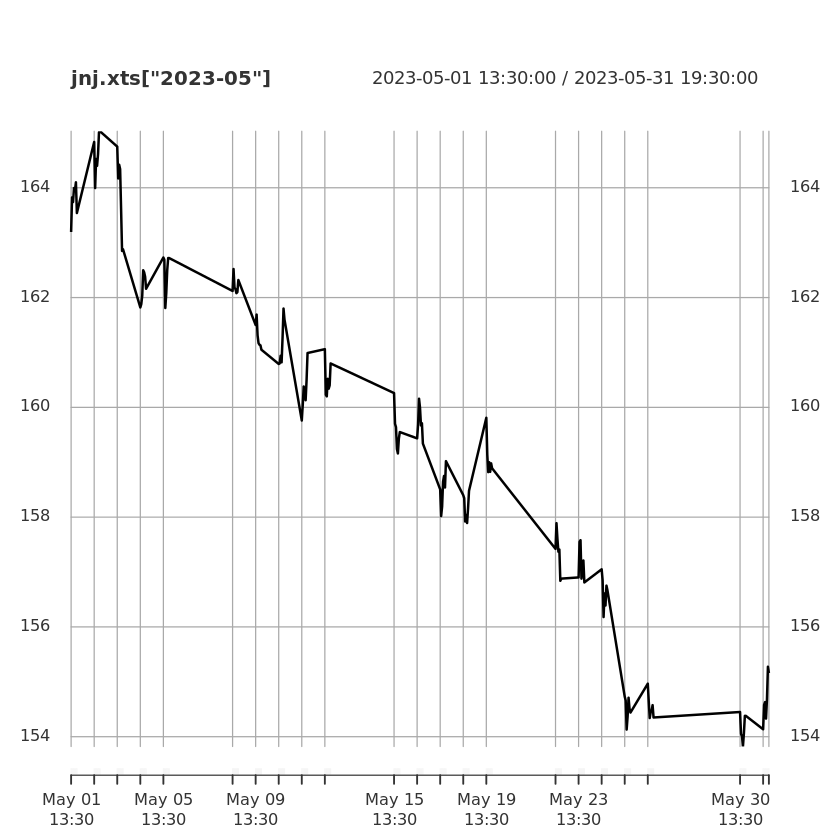

In [17]:
plot(jnj.xts["2023-05"])

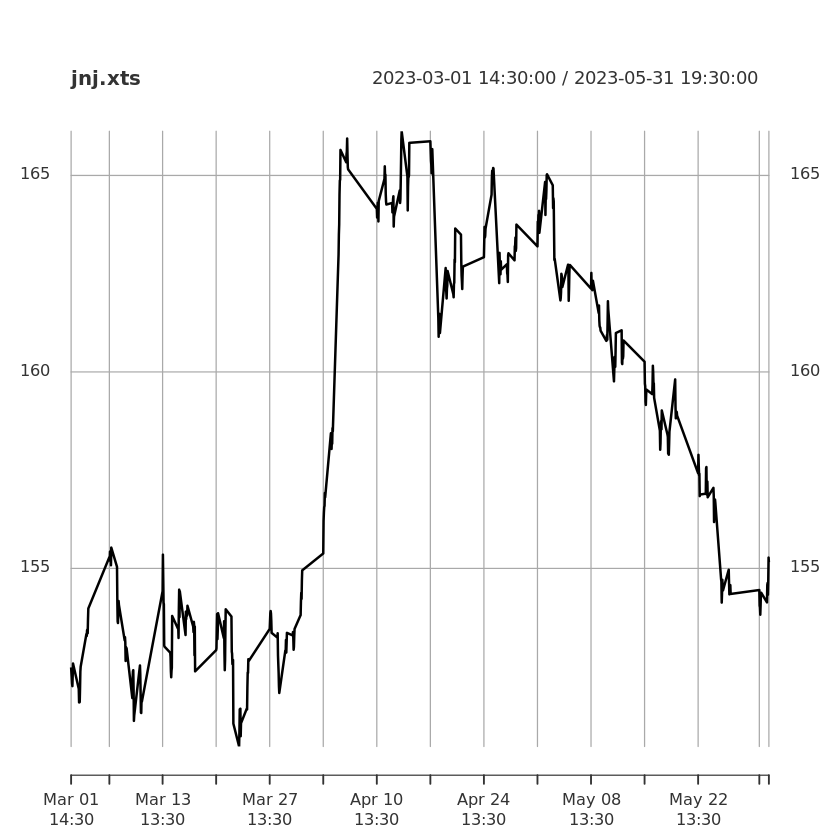

In [18]:
plot(jnj.xts)

Let's see what *ggplot2* does

In [ ]:
autoplot(jnj.xts)

This class also makes it easy to aggregate periods within the time series, depending on a function. See help for *apply.PERIOD*.

In [19]:
jnj.xts_day <-apply.daily(jnj.xts, FUN=mean)

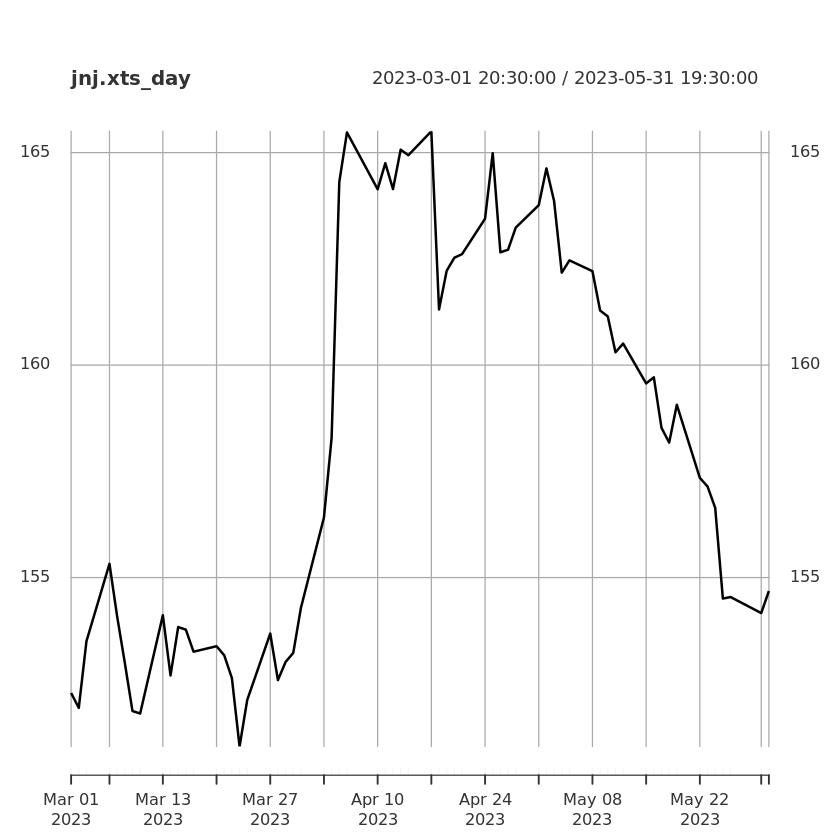

In [20]:
plot(jnj.xts_day)

In [21]:
jnj.xts_day[1:10]

                        [,1]
2023-03-01 20:30:00 152.2834
2023-03-02 20:30:00 151.9329
2023-03-03 20:30:00 153.5029
2023-03-06 20:30:00 155.3235
2023-03-07 20:30:00 154.0857
2023-03-08 20:30:00 152.9927
2023-03-09 20:30:00 151.8586
2023-03-10 20:30:00 151.8007
2023-03-13 19:30:00 154.1129
2023-03-14 19:30:00 152.6957

### 1.b - Multivariate time series

Next, we want to create multivariate time series

In [22]:
# Load PFE and AAPL
df_PFE <- read.csv("./datasets/PFE_30min_2303-2306.csv")
df_PFE <- df_PFE[c(1:nrow(df_PFE)-1), colnames(df_PFE) != "X"]
df_AAPL <- read.csv("./datasets/AAPL_30min_2303-2306.csv")
df_AAPL <- df_AAPL[c(1:nrow(df_AAPL)-1), colnames(df_AAPL) != "X"]

In [27]:
# Close prices data array
clprices_arr <- matrix(c(df_AAPL$close, df_JNJ$close, df_PFE$close),
                       nrow = length(df_AAPL$close),
                       ncol = 3,
                       byrow = FALSE,
                       dimnames = list(c(1:length(df_AAPL$close)), c("AAPL", "JNJ", "PFE"))
                      )

In [28]:
clprices_arr[c(1:5),]

,AAPL,JNJ,PFE
1,145.67,152.480,40.535
2,145.95,152.350,40.489
3,146.42,152.220,40.445
4,145.97,152.070,40.380
5,145.36,152.004,40.155


In [29]:
stocks.xts <- xts(x = clprices_arr, order.by = as.POSIXct(df_AAPL$date))

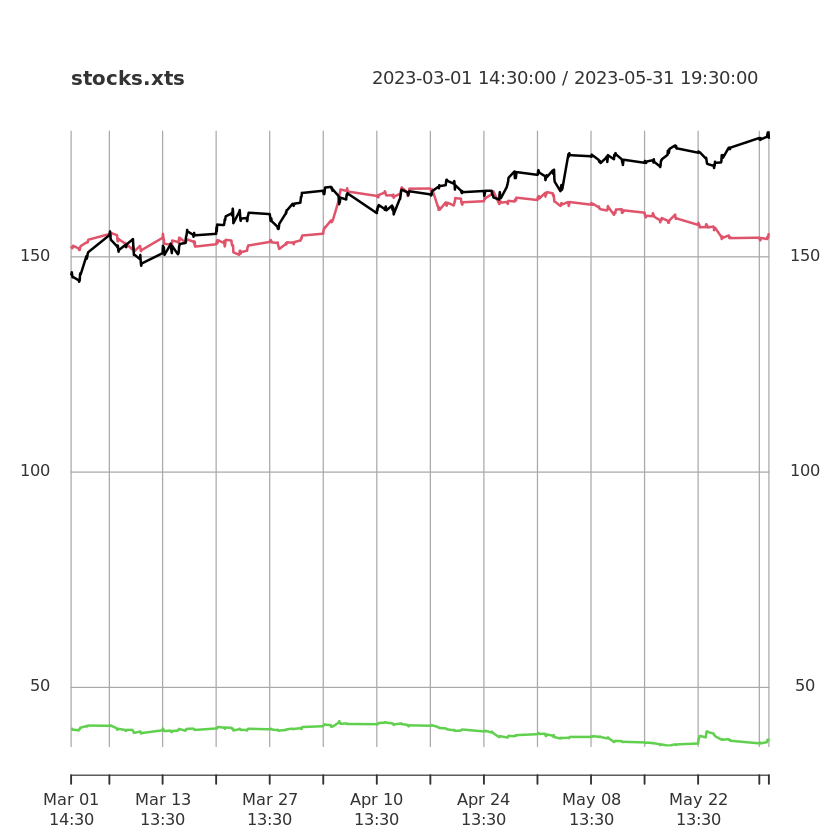

In [30]:
plot(stocks.xts, )

This is at another level of functionality.

In [ ]:
print(stocks.xts)

### 1.c - Useful *xts* functions

**To be determined**

See docs at: https://cran.r-project.org/web/packages/xts/xts.pdf

In [3]:
# Load JNJ, PFE and AAPL
df_JNJ <- read.csv("./datasets/JNJ_30min_2303-2306.csv")
df_JNJ <- df_JNJ[c(1:nrow(df_JNJ)-1), colnames(df_JNJ) != "X"]
df_PFE <- read.csv("./datasets/PFE_30min_2303-2306.csv")
df_PFE <- df_PFE[c(1:nrow(df_PFE)-1), colnames(df_PFE) != "X"]
df_AAPL <- read.csv("./datasets/AAPL_30min_2303-2306.csv")
df_AAPL <- df_AAPL[c(1:nrow(df_AAPL)-1), colnames(df_AAPL) != "X"]

# Make multivariate time series with close prices
clprices_arr <- matrix(c(df_AAPL$close, df_JNJ$close, df_PFE$close),
                       nrow = length(df_AAPL$close),
                       ncol = 3,
                       byrow = FALSE,
                       dimnames = list(df_AAPL$date, c("AAPL", "JNJ", "PFE"))
                      )
xts_stocks <- xts(x = clprices_arr, order.by = as.POSIXct(df_AAPL$date))

In [4]:
clprices_arr[1:10,]

,AAPL,JNJ,PFE
2023-03-01 14:30:00,145.670,152.480,40.5350
2023-03-01 15:30:00,145.950,152.350,40.4890
2023-03-01 16:30:00,146.420,152.220,40.4450
2023-03-01 17:30:00,145.970,152.070,40.3800
2023-03-01 18:30:00,145.360,152.004,40.1550
2023-03-01 19:30:00,145.225,152.280,40.2295
2023-03-01 20:30:00,145.320,152.580,40.1900
2023-03-02 14:30:00,144.550,151.935,40.0150
2023-03-02 15:30:00,144.210,151.590,40.2650
2023-03-02 16:30:00,144.360,151.590,40.2950


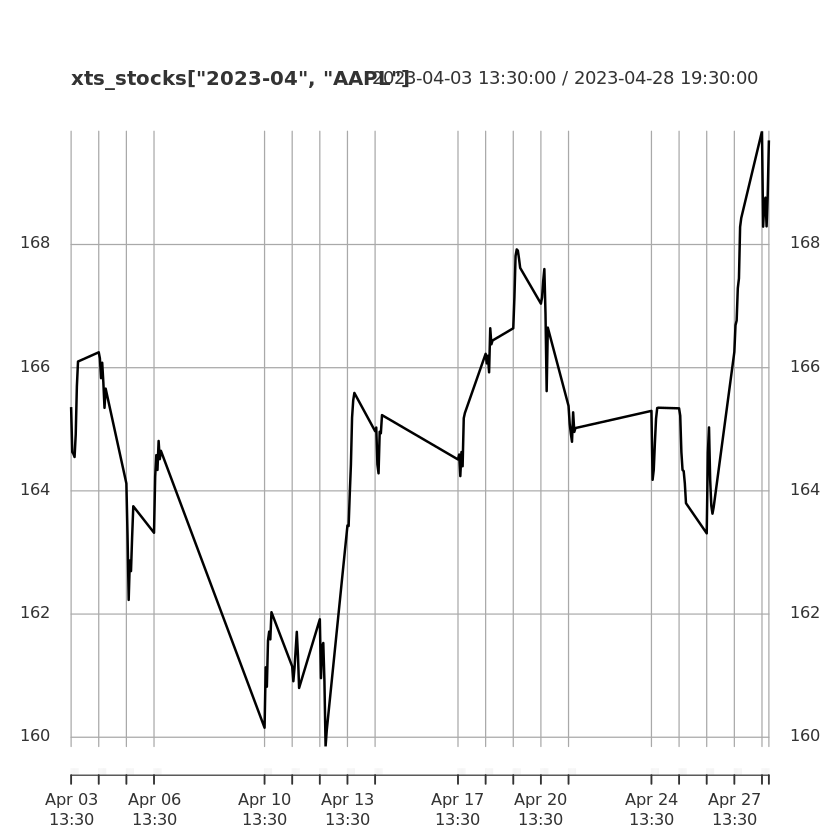

In [26]:
plot(xts_stocks["2023-04","AAPL"])

#### *coredata()* and *index()* - Foundational 

These two functions allow us to access the values and the timestamps of a given *xts* object.

In [27]:
tail(coredata((xts_stocks[,"AAPL"])))

,AAPL
"[443,]",178.3200
"[444,]",178.7427
"[445,]",178.8900
"[446,]",179.1699
"[447,]",178.7179
"[448,]",177.4200


In [28]:
class(coredata((xts_stocks[,"AAPL"])))

[1] "matrix" "array"

In [29]:
head(index(xts_stocks))

[1] "2023-03-01 14:30:00 UTC" "2023-03-01 15:30:00 UTC"
[3] "2023-03-01 16:30:00 UTC" "2023-03-01 17:30:00 UTC"
[5] "2023-03-01 18:30:00 UTC" "2023-03-01 19:30:00 UTC"

In [30]:
class(index(xts_stocks))

[1] "POSIXct" "POSIXt"

Obviously, to modify these entries, one uses the "<-" operator in conjuction with these functions.

#### *periodicity()*

In [5]:
periodicity(xts_stocks)

Hourly periodicity from 2023-03-01 14:30:00 to 2023-05-31 19:30:00 

#### *dimnames()*

In [6]:
dimnames(xts_stocks)

[[1]]
NULL

[[2]]
[1] "AAPL" "JNJ"  "PFE"

#### *diff()* - Differencing of time series

In [50]:
xts_stocks_diff <- diff(xts_stocks)

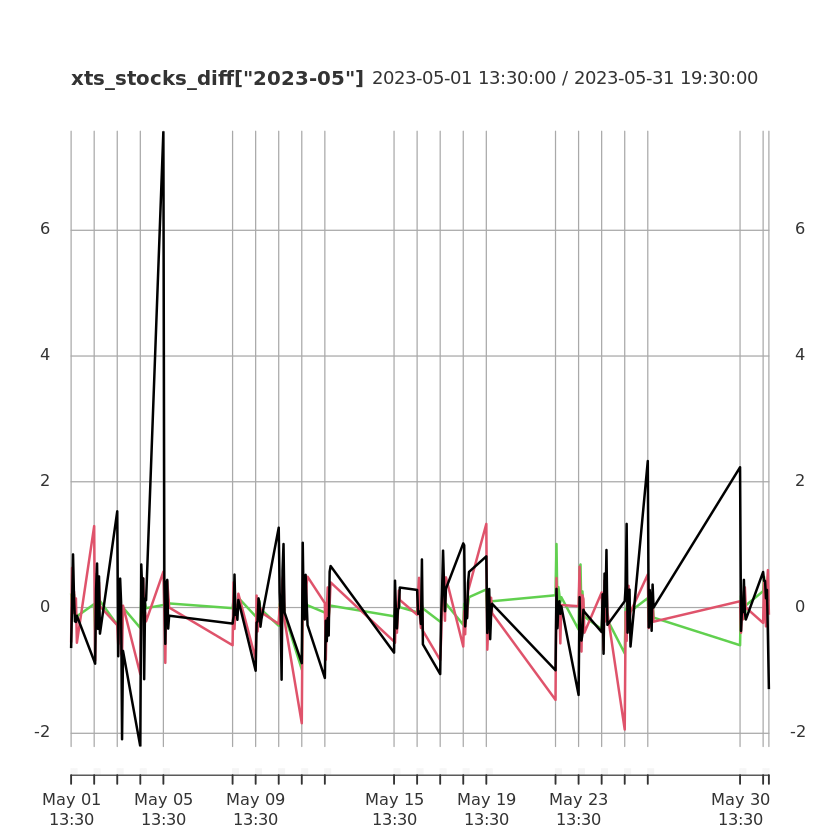

In [51]:
plot(xts_stocks_diff["2023-05"])

#### *window()*

From docs: *window()* is a generic function which extracts the subset of the object x observed between the times start and end. If a frequency is specified, the series is then re-sampled at the new frequency.

In [7]:
window(xts_stocks, deltat = 15)

                        AAPL      JNJ     PFE
2023-03-01 14:30:00 145.6700 152.4800 40.5350
2023-03-01 15:30:00 145.9500 152.3500 40.4890
2023-03-01 16:30:00 146.4200 152.2200 40.4450
2023-03-01 17:30:00 145.9700 152.0700 40.3800
2023-03-01 18:30:00 145.3600 152.0040 40.1550
2023-03-01 19:30:00 145.2250 152.2800 40.2295
2023-03-01 20:30:00 145.3200 152.5800 40.1900
2023-03-02 14:30:00 144.5500 151.9350 40.0150
2023-03-02 15:30:00 144.2100 151.5900 40.2650
2023-03-02 16:30:00 144.3600 151.5900 40.2950
                ...                          
2023-05-30 17:30:00 177.5901 154.0592 37.1600
2023-05-30 18:30:00 177.5200 154.3800 36.9850
2023-05-30 19:30:00 177.3300 154.3800 37.0200
2023-05-31 13:30:00 177.8950 154.1350 37.2799
2023-05-31 14:30:00 178.3200 154.5800 37.7650
2023-05-31 15:30:00 178.7427 154.6300 37.6999
2023-05-31 16:30:00 178.8900 154.3300 37.5550
2023-05-31 17:30:00 179.1699 154.6800 37.8356
2023-05-31 18:30:00 178.7179 155.2750 37.9700
2023-05-31 19:30:00 177.4200 155.1

### 1.d - Conversions with *tsbox*

*forecast* works with *ts* objects while my other packages use *xts*. In this case, it's important to have *tsbox*, which allows to convert between time series formats reliably (see *ts_ts* in docs). The docs are here:

https://cran.r-project.org/web/packages/tsbox/index.html

Among other things, we can immediately convert a dataframe to *xts*

We start with the example of the *Nile* time series, giving the flow of the nile at Aswan from 1871 to 1970. This is a *ts* time series, and *tsbox* 


In [9]:
# Show class
cat("class(Nile): ", class(Nile),"\n")

# Convert to xts
xts_nile <- ts_xts(Nile)

class(Nile):  ts 


The difference can be seen from the *plot()* functions:

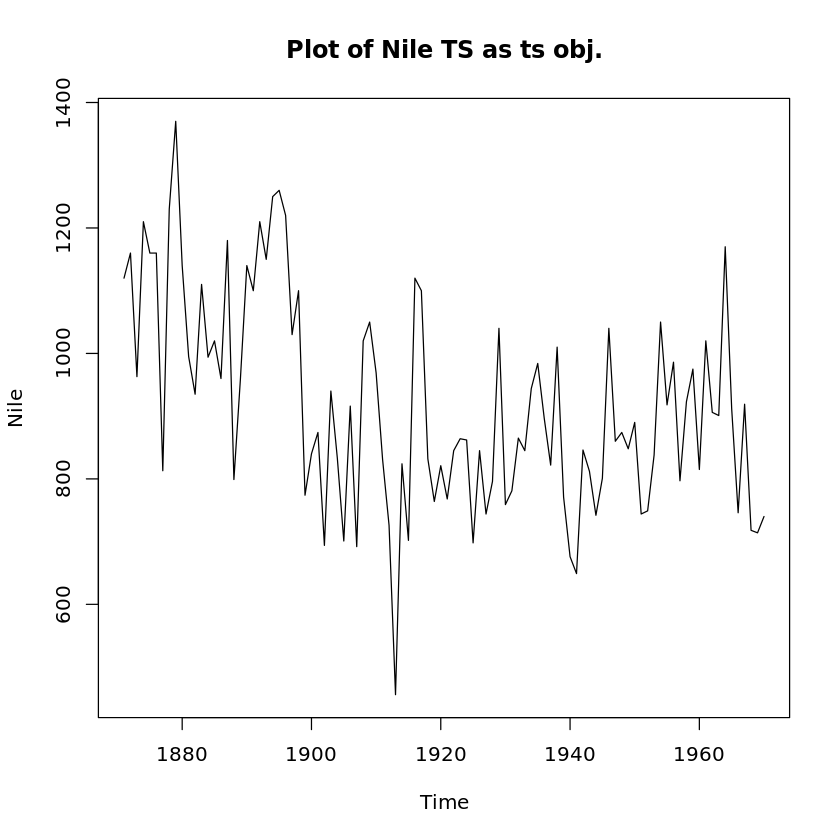

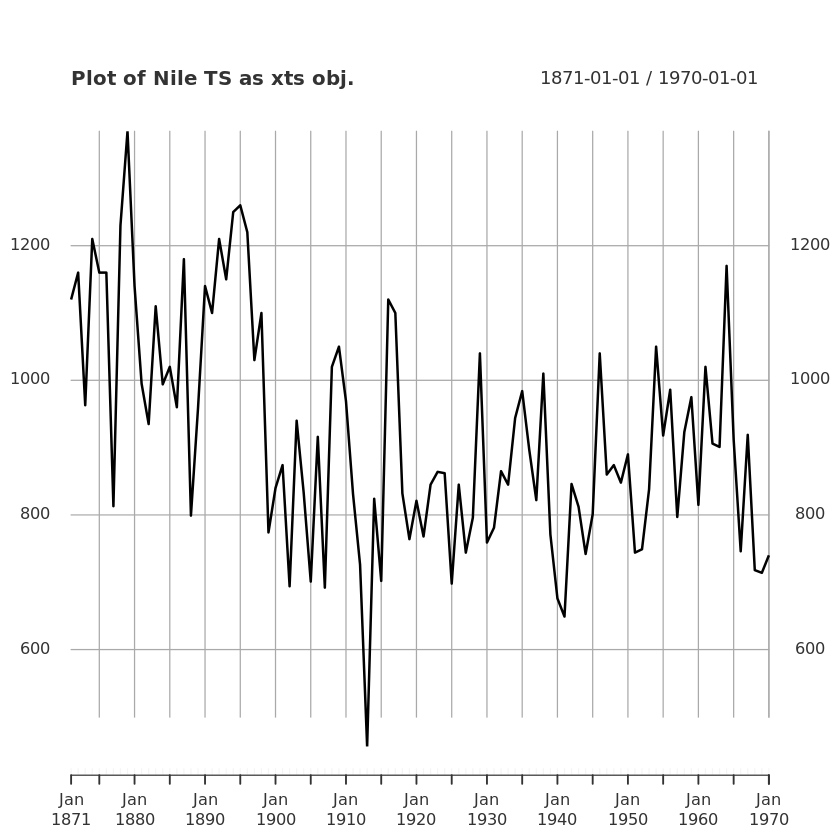

In [10]:
# Plot Nile
plot(Nile, main = "Plot of Nile TS as ts obj.")
plot(xts_nile, main = "Plot of Nile TS as xts obj.")

In [13]:
head(df_JNJ[, c("date", "close")])

,date,close
,<chr>,<dbl>
1,2023-03-01 14:30:00,152.480
2,2023-03-01 15:30:00,152.350
3,2023-03-01 16:30:00,152.220
4,2023-03-01 17:30:00,152.070
5,2023-03-01 18:30:00,152.004
6,2023-03-01 19:30:00,152.280


### 1.e - Contents of a *ts* object

The *coredata()* and *index()* functions are generic and also work on *ts* objects.

In [31]:
coredata(Nile)

[1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740

In [32]:
index(Nile)

[1] 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 [16] 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900
 [31] 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915
 [46] 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 [61] 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 [76] 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 [91] 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970

## 2) Simple moving-average smoothing and seasonal decomposition

Start with Kabacoff, section 15.2. We'll use the built-in *Nile* time series, recording the flow of the nile at Aswan from 1871 to 1970.



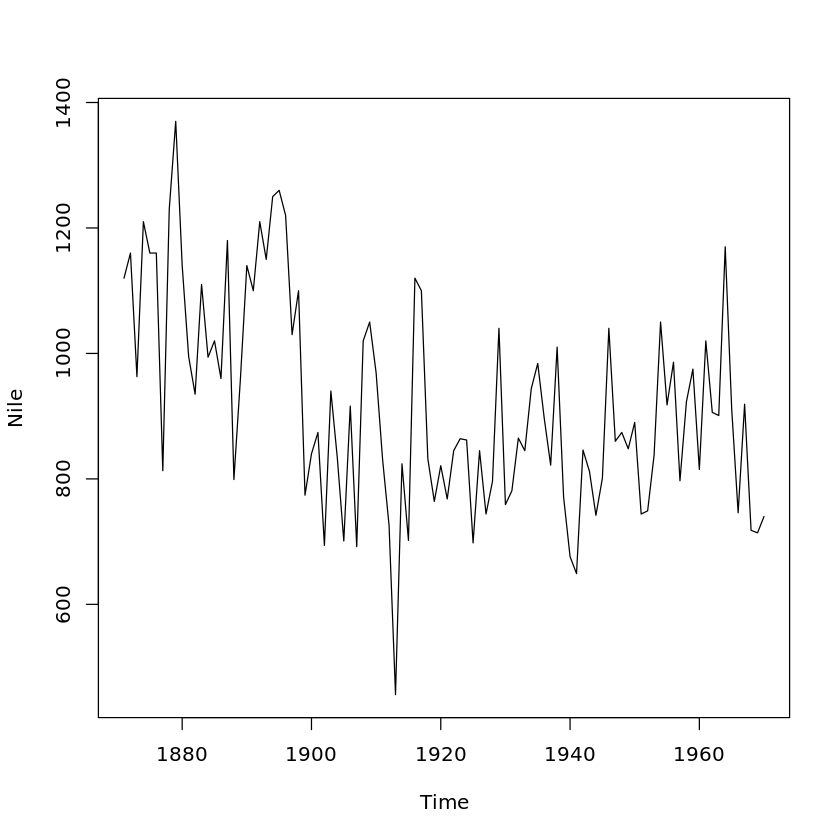

In [56]:
plot(Nile)

### 2.a - SMA smoothing

Notes:
- Given a time series $\{Y_t\}$, a centered moving average with $k=2q+1$ observations is a transformation $\{S_t\}$ where:
$$S_t = \frac{1}{(2q+1)}(Y_{t-q}+\cdots+Y_{t-1}+Y_t+\cdots Y_{t+1}).$$
    The effect of this transformation is a smoothing of the original time series. When statisticians refer to a "simple moving average", this is what they are referring to by default.
- We will use the *ma()* function from *forecast* to do this smoothing. There are many other implementations in R.
- SMAs help in discerning patterns in a time series.
- The signature of *ma()* is:
        
        ma(x, order, centre = TRUE)
    where *order* is refers to the number of ovbservations averaged. **This function returns a *ts* object.** 

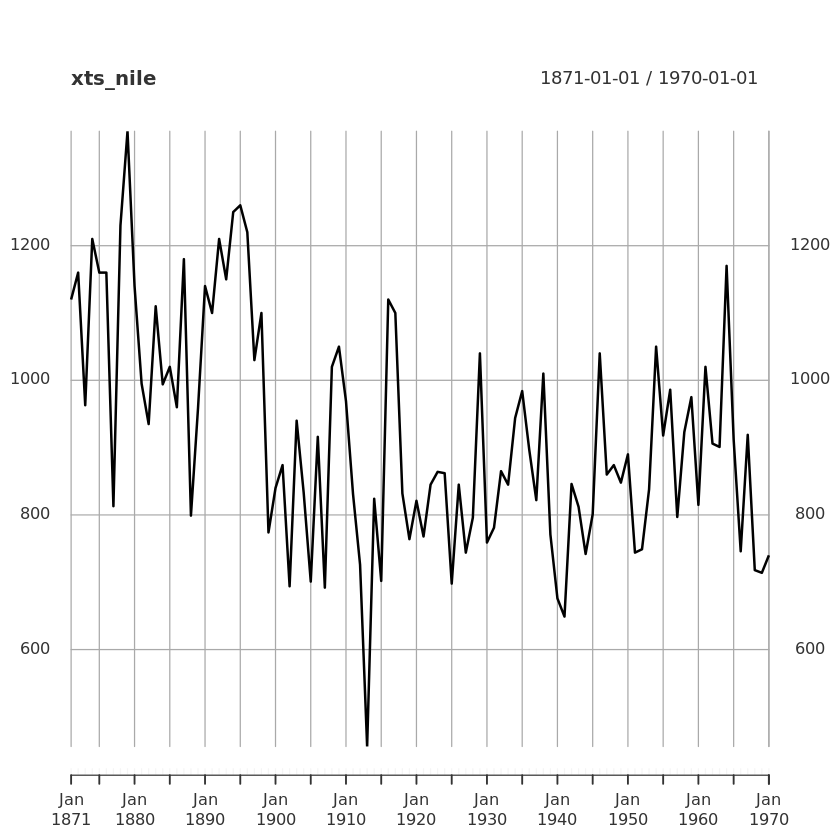

In [35]:
# Convert Nile to xts object
xts_nile <- ts_xts(Nile)
plot(xts_nile)

Next, we compute the centered SMAs of *Nile* for $k=3,5,7$. We use the *ts* object since *forecast::ma()* expects *ts* objects (otherwise the indices get messed-up), and then convert to *xts*.

In [36]:
# Create simple moving averages with k=3, 5, 7
sma_nile_k3 <- ts_xts(ma(x = Nile, order = 3))
sma_nile_k5 <- ts_xts(ma(x = Nile, order = 5))
sma_nile_k7 <- ts_xts(ma(x = Nile, order = 7))

# Check lengths
cat("length(sma_nile_k3) = ", length(sma_nile_k3),"\n")
cat("length(sma_nile_k5) = ", length(sma_nile_k5),"\n")
cat("length(sma_nile_k7) = ", length(sma_nile_k7),"\n")

length(sma_nile_k3) =  100 
length(sma_nile_k5) =  100 
length(sma_nile_k7) =  100 


Since we are using certain entries of *xts_nile* when computing the SMAs, there are *NA* values in the smoothed time series. After getting these indices with *which()*, we replace them with 0.

In [49]:
# Get indices of the SMA TS' that are NA
na_ind_k3 <- which(is.na(sma_nile_k3))
na_ind_k5 <- which(is.na(sma_nile_k5))
na_ind_k7 <- which(is.na(sma_nile_k7))

# Replace NAs with 0
coredata(sma_nile_k3)[na_ind_k3] <- 0
coredata(sma_nile_k5)[na_ind_k5] <- 0
coredata(sma_nile_k7)[na_ind_k7] <- 0

Next, we merge these into an *xts* multivariate time series that we plot:

In [61]:
# Merge to one
xts_smas_nile <- merge.xts(xts_nile, sma_nile_k3, sma_nile_k5, sma_nile_k7)
# Add cloumn names
dimnames(xts_smas_nile) <- list("date",c("Nile", "SMA3", "SMA5", "SMA7"))

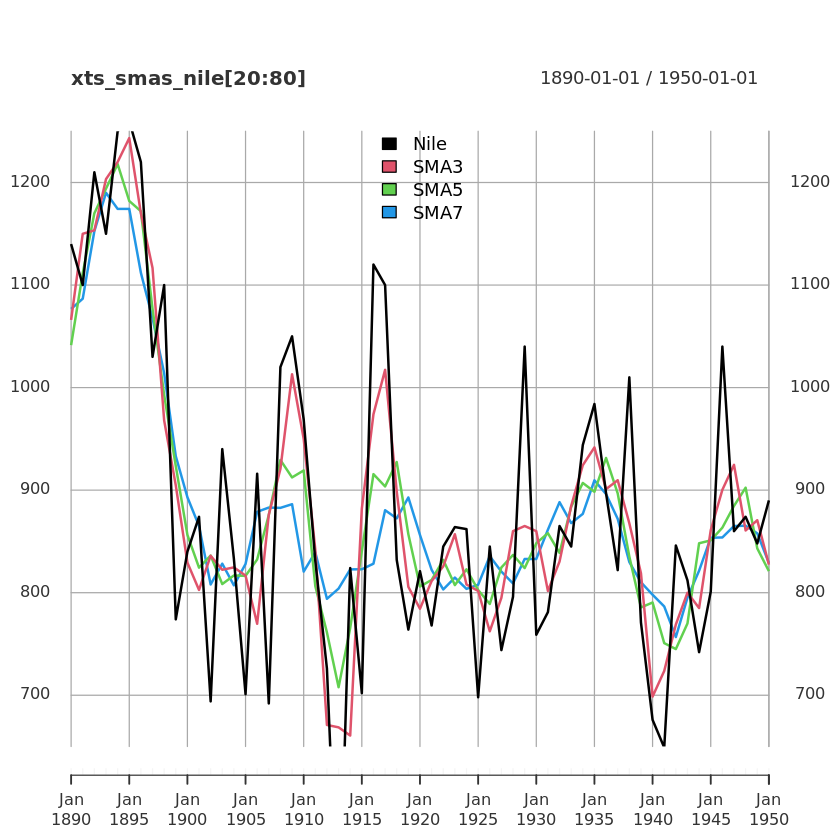

In [63]:
# Plot
plot(xts_smas_nile[20:80], ylim=c(650,1250), legend.loc = 4)

As we add terms to the averages, we see that the time series is relatively smoother.

### 2.b - Seasonal decomposition

The next task is to perform the trend-seasonal-error decomposition of a time series. Note that this decomposition can be assitive or multiplicative. For this example, we use the *AirPassengers*. 

To do this, we will use the *stl()* function from the stats package. The signature is:
        
        stl(x, s.window, s.degree = 0,
            t.window = NULL, t.degree = 1,
            l.window = nextodd(period), l.degree = t.degree,
            s.jump = ceiling(s.window/10),
            t.jump = ceiling(t.window/10),
            l.jump = ceiling(l.window/10),
            robust = FALSE,
            inner = if(robust)  1 else 2,
            outer = if(robust) 15 else 0,
            na.action = na.fail)
            
As usual, *x* is a *ts* object, and *s.window* is the span of the so-called Loess window, or *"period"*. This function outputs an *stl* object whose attributes can be accessed through *attributes()*.

Here is the **additive** STL decomposition of the *AirPassengers* time series:

In [75]:
# get additive STL decomposition
stl_airpass <- stl(AirPassengers, s.window = "period")
# Show attributes
attributes(stl_airpass)

$names
[1] "time.series" "weights"     "call"        "win"         "deg"        
[6] "jump"        "inner"       "outer"      

$class
[1] "stl"

In [76]:
# Show head() of contents
head(stl_airpass$time.series)

,seasonal,trend,remainder
Jan 1949,-25.497718,127.1873,10.3103699
Feb 1949,-35.220935,126.6495,26.5714028
Mar 1949,-3.027478,126.1117,8.9157625
Apr 1949,-8.299054,126.1989,11.1001224
May 1949,-5.737289,126.2861,0.4511408
Jun 1949,32.336634,126.7330,-24.0696572


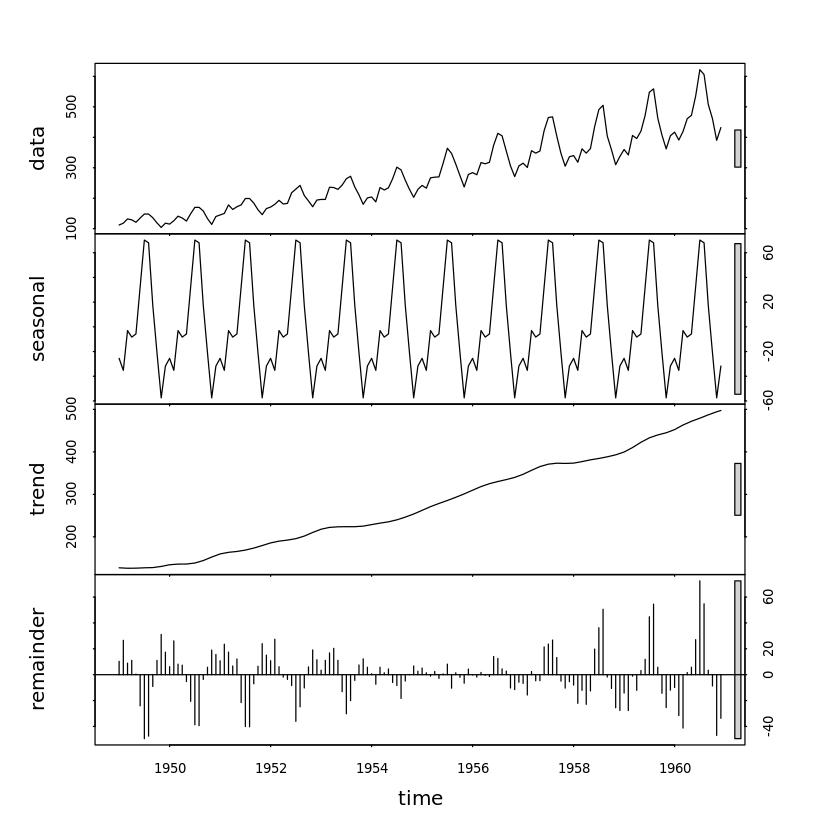

In [77]:
plot(stl_airpass)

Next, to get a multiplicative decomposition, we can look at the log of the original time series.

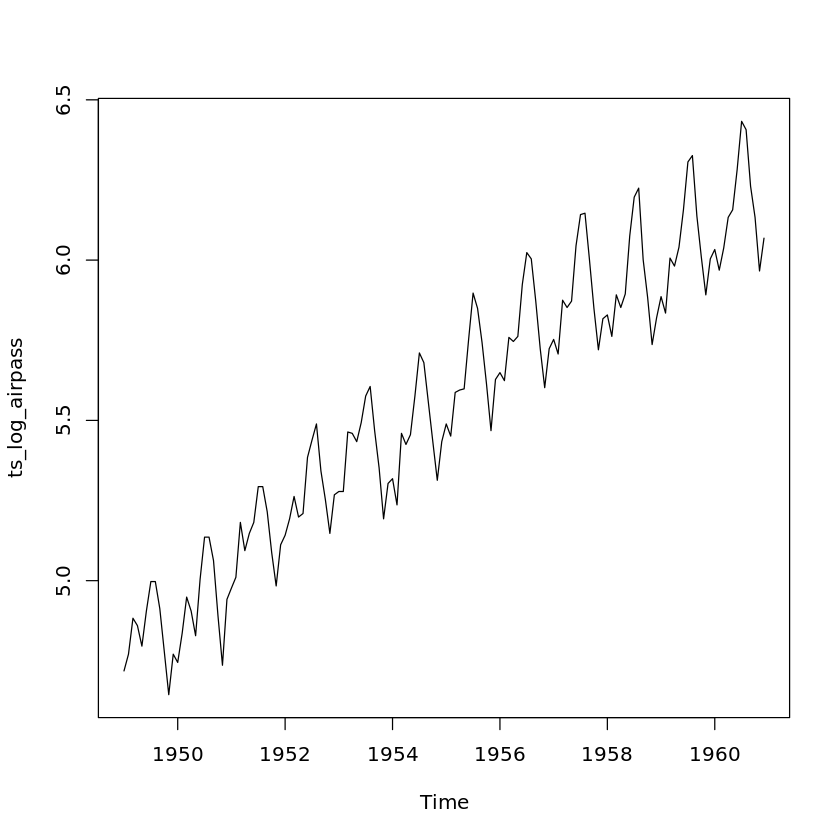

In [78]:
# Make log time series
ts_log_airpass <- log(AirPassengers)
plot(ts_log_airpass)

In [79]:
# Make stl of log TS
stl_log_out <- stl(ts_log_airpass, s.window = "period")

In [86]:
# Recover decomposed times series
ts_decomp_log_airpass <- stl_log_out$time.series
ts_mdecomp_airpass <- exp(ts_decomp_log_airpass)
# Check class
class(ts_decomp_log_airpass)

[1] "mts"    "ts"     "matrix" "array"

Now let's plot the four resulting time series. We don't use *plot.stl()* here, so we use the *par()* function to combine the plots into one figure (*mfrow* is the *(n_row, n_col)* vector and *mar designates the margins*)

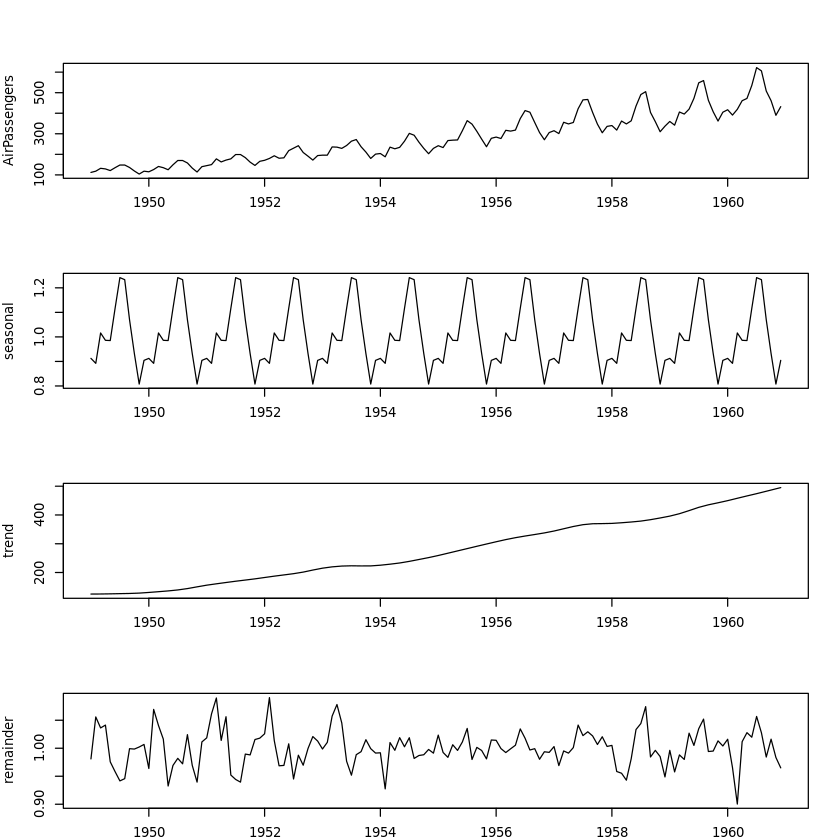

In [92]:
# Combine plots into one figure
## Ref: https://www.statology.org/r-multiple-plots-on-same-graph/
par(mfrow = c(4,1), mar = c(2,4,4,2))
plot(AirPassengers)
plot(ts_mdecomp_airpass[,"seasonal"], ylab = "seasonal")
plot(ts_mdecomp_airpass[,"trend"], ylab = "trend")
plot(ts_mdecomp_airpass[,"remainder"], ylab = "remainder")

## 3) Exponential smoothing and the Holt-Winters model

Ref: Kabacoff section 15.3. We discuss three models here. Instead of smoothing a time series using averages of its lags, we use the so-called "exponential smoothing function". This name is misleading, because in practice, we are smoothing using powers of a constant, so as to give more weight to recent realizations of the time series.

**Simple exponential smoothing:** The time series model for $\{Y_t\}$ assumes two things here. First, the time series is a sum of a constant trend $\mu_0$ and a white noise term:
$$Y_t = \mu_0 + \varepsilon_t,$$
and second, the series is a **weighted sum** of its previous terms:
$$Y_{t+1} = \sum_{j=0}^t \alpha(1-\alpha)^i Y_{t-i},\ \forall t\ge 0,\ 0<\alpha<1.$$
The closer $\alpha$ is to 1, the higher the weights of the more recent observations $Y_t$.

**Holt model - Double exponential smoothing:** In this model, we account for a linear trend, so that the time series is of the form:
$$Y_t = \mu_0 + \mu_1 t+ \varepsilon_t,$$
with $\mu_0$ usually called the *level* and $\mu_1$ the *slope*. Without going into the mathematical details, this time the model requires 2 parameters $\alpha,\beta\in]0,1[$, one for the exponential decay of the level, and the other for the decay of the slope.

**Holt-Winters model - Triple exponential smoothing:** This last model accounts for seasonality by adding a seasonal term $S_t$ term to $\{Y_t\}$:
$$Y_t = \mu_0 + \mu_1 t + S_t + \varepsilon_t.$$
Here the model parameters are $\alpha,\beta,\gamma\in]0,1[$, where $gamma$ controls the exponential decay of the seasonal component $S_t$, and where $\alpha$ and $\beta$ are as in the Holt model.

For later reference, we note that exponential smoothing is a state space model. With these considerations in mind, we now turn to the fitting and forecasting functions for these models (in *forecast*).

In [41]:
library(forecast)
library(xts)
library(tsbox)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




We will use two time series for our examples: the logarithm of *AirPassengers* and the *nhtemp* time series.

In [2]:
# Assignments
ts_nhtemp <- nhtemp
ts_log_AirP <- log(AirPassengers)

### 3.a - The *ets* model class - Fitting to a Holt-Winters model

The *ets* S3 class in the *forecast* package implements the fitting algorithm for a Holt-Winters model. The simpler exponential smoothing and Holt models can be instantiated by specifying the *model* parameter in the constructor.

The signature of the *ets()* instantiation function is:

        ets(y,
          model = "ZZZ",
          damped = NULL,
          alpha = NULL,
          beta = NULL,
          gamma = NULL,
          phi = NULL,
          additive.only = FALSE,
          lambda = NULL,
          biasadj = FALSE,
          lower = c(rep(1e-04, 3), 0.8),
          upper = c(rep(0.9999, 3), 0.98),
          opt.crit = c("lik", "amse", "mse", "sigma", "mae"),
          nmse = 3,
          bounds = c("both", "usual", "admissible"),
          ic = c("aicc", "aic", "bic"),
          restrict = TRUE,
          allow.multiplicative.trend = FALSE,
          use.initial.values = FALSE,
          na.action = c("na.contiguous", "na.interp", "na.fail"),
          ...
        )
Above, the two main parameters are *y* for the observed time series, and the *model* parameter. In the documentation, the latter is described as follows: Usually a three-character string identifying method: 
* The first letter denotes the error type ("A", "M" or "Z"); 
* The second letter denotes the trend type ("N","A","M" or "Z"); 
* The third letter denotes the season type ("N","A","M" or "Z"). 

In all cases, "N"=none, "A"=additive, "M"=multiplicative and "Z"=automatically selected. So, for example, "ANN" is simple exponential smoothing with additive errors, "MAM" is multiplicative Holt-Winters' method with multiplicative errors, and so on. (See help for remaining parameters.) Concretely, this means that we use:

        # For simple exponential smoothing:
        model <- ets(ts, model = "ANN")
        # For double exponential smoothing (Holt):
        model <- ets(ts, model = "AAN")
        # For double exponential smoothing (Holt-Winters):
        model <- ets(ts, model = "AAN")


Here is how we fit the New Haven temperature time series to a simple exponential smoothing model:

In [3]:
# Fit with ets()
nht_expsm_fit <- ets(ts_nhtemp, model = "ANN")
nht_expsm_fit

ETS(A,N,N) 

Call:
 ets(y = ts_nhtemp, model = "ANN") 

  Smoothing parameters:
    alpha = 0.1819 

  Initial states:
    l = 50.2762 

  sigma:  1.1455

     AIC     AICc      BIC 
265.9298 266.3584 272.2129 

In [4]:
# Show class
cat("class(nht_expsm_fit): ", class(nht_expsm_fit),"\n")
# Show attributes
cat("attributes(nht_expsm_fit): \n")
attributes(nht_expsm_fit)

class(nht_expsm_fit):  ets 
attributes(nht_expsm_fit): 


$names
 [1] "loglik"     "aic"        "bic"        "aicc"       "mse"       
 [6] "amse"       "fit"        "residuals"  "fitted"     "states"    
[11] "par"        "m"          "method"     "series"     "components"
[16] "call"       "initstate"  "sigma2"     "x"         

$class
[1] "ets"

The parameters of the resulting model are accessed with using the *fit*, *value*, and *par* attributes.

In [5]:
nht_expsm_fit$fit

$value
[1] 259.9298

$par
[1]  0.1818932 50.2762040

$fail
[1] 0

$fncount
[1] 55

In particular, *par* gives us the $alpha\in]0,1[$ parameter and initial value of the time series:

In [6]:
# Show fit param class
cat("class(nht_expsm_fit$par): ", class(nht_expsm_fit$par), "\n")
# Show init. value:
cat("nht_expsm_fit$par[\"l\"] = ")
nht_expsm_fit$par["l"]
# Show alpha
cat("nht_expsm_fit$par[\"alpha\"] = ")
nht_expsm_fit$par["alpha"]

class(nht_expsm_fit$par):  numeric 
nht_expsm_fit$par["l"] = 

l 
50.2762

nht_expsm_fit$par["alpha"] = 

alpha 
0.1818932

To access the fitted values and residuals, one can use the genereic functions *fitted.values()* and *residuals*:

In [7]:
# Fitted
head(fitted.values(nht_expsm_fit))

A Time Series:
[1] 50.27620 50.20778 50.58834 50.37219 50.50457 50.30366

In [8]:
# Residuals
head(residuals(nht_expsm_fit))

A Time Series:
[1] -0.3762040  2.0922250 -1.1883365  0.7278138 -1.1045706 -2.4036567

Next, we fit the log-air passenger time series to a Holt-Winters model as follows:

In [9]:
# Fit with ets()
lAirP_HW_fit <- ets(ts_log_AirP, model = "AAA")
lAirP_HW_fit

ETS(A,A,A) 

Call:
 ets(y = ts_log_AirP, model = "AAA") 

  Smoothing parameters:
    alpha = 0.6975 
    beta  = 0.0031 
    gamma = 1e-04 

  Initial states:
    l = 4.7925 
    b = 0.0111 
    s = -0.1045 -0.2206 -0.0787 0.0562 0.2049 0.2149
           0.1146 -0.0081 -0.0059 0.0225 -0.1113 -0.0841

  sigma:  0.0383

      AIC      AICc       BIC 
-207.1694 -202.3123 -156.6826 

Our next task is to use these *ets* objects to make forecasts and discuss the forecasting accuracy.

### 3.b - Forecasting with a Holt-Winters model - *forecast.ets()*

The core of the *forecast* package is the generic function of the same name. Typically,  *forecast()* takes as input the output of *fit()*, and the attributes of the resulting *forecast* object depend on the model.

In the particular case of *forecast.ets()*, the signature is as follows:

        forecast(object,
              h = ifelse(object$m > 1, 2 * object$m, 10),
              level = c(80, 95),
              fan = FALSE,
              simulate = FALSE,
              bootstrap = FALSE,
              npaths = 5000,
              PI = TRUE,
              lambda = object$lambda,
              biasadj = NULL,
              ...
            )
where *object* is the fitted model and *h* is the number of forecasts. Before illustrating with the New Haven temperature and air passengers time series, let us split our series into training and testing.

**Note:** The *xts* class is much more convenient to use than *ts* for splitting by number of entries. Also, when indexing with *xts*, R needs parentheses for subtractions.

In [10]:
# No. of forecasts and lengths of time series
N_pred <- 10
len_nhtemp <- length(ts_nhtemp)
len_AirP <- length(ts_log_AirP)
xts_nhtemp <- ts_xts(ts_nhtemp)
xts_lAirP <- ts_xts(ts_log_AirP)

# Training series
ts_nhtemp_train <- ts_ts(xts_nhtemp[1:(len_nhtemp-N_pred)])
ts_log_AirP_train <- ts_ts(xts_lAirP[1:(len_AirP-N_pred)])

# Test sets
ts_nhtemp_test <-ts_ts(xts_nhtemp[(len_nhtemp-N_pred+1) : len_nhtemp])
ts_log_AirP_test <- ts_ts(xts_lAirP[(len_AirP-N_pred+1) : len_AirP])

In [23]:
# Fit ts_nhtemp_train to ets(, "ANN")
nhtemp_expsm_model <- ets(ts_nhtemp_train, model = "ANN")

# Fit ts_log_AirP_train to ets(, "AAA")
logAirP_HW_model <- ets(ts_log_AirP_train, model = "AAA")

Let's look at the summaries:

In [24]:
# Summary for NH temperatures
summary(nhtemp_expsm_model)

ETS(A,N,N) 

Call:
 ets(y = ts_nhtemp_train, model = "ANN") 

  Smoothing parameters:
    alpha = 0.1774 

  Initial states:
    l = 50.2743 

  sigma:  1.2127

     AIC     AICc      BIC 
218.8447 219.3665 224.5808 

Training set error measures:
                    ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.1832529 1.188195 0.9549865 0.3094949 1.867204 0.7334536
                    ACF1
Training set -0.02696587

In [110]:
# Summary for log AirPassengers
summary(logAirP_HW_model)

ETS(A,A,A) 

Call:
 ets(y = ts_log_AirP_train, model = "AAA") 

  Smoothing parameters:
    alpha = 0.7238 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 4.7899 
    b = 0.0095 
    s = -0.1037 -0.2184 -0.0793 0.0627 0.2055 0.2133
           0.1116 -0.0142 -0.0117 0.0298 -0.1073 -0.0883

  sigma:  0.0367

      AIC      AICc       BIC 
-212.1218 -206.8459 -162.8585 

Training set error measures:
                       ME       RMSE        MAE         MPE      MAPE      MASE
Training set 0.0002862356 0.03448314 0.02703493 0.005189969 0.5005498 0.2200563
                   ACF1
Training set 0.03446046

#### Exponential smoothing forecast

Next, we produce the first forecasts:

In [101]:
# Make forecast with 10 predictions:
pred_nhtemp <- forecast(nhtemp_expsm_model, h= N_pred)

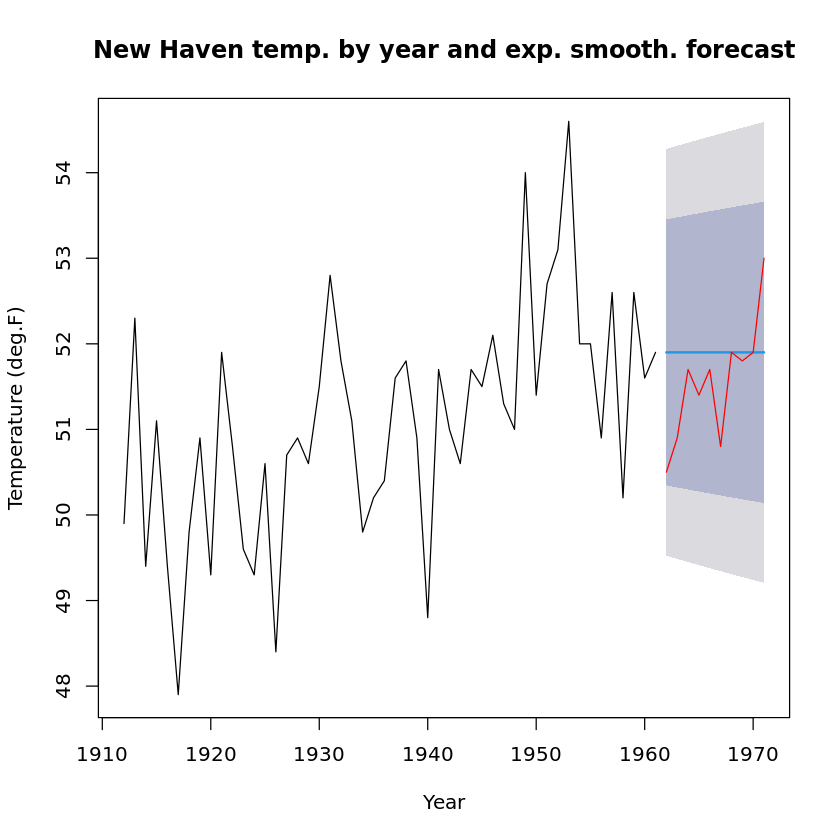

In [104]:
# Plot from forecast object
plot(pred_nhtemp,
     main = "New Haven temp. by year and exp. smooth. forecast",
     xlab = "Year",
     ylab = "Temperature (deg.F)"
    )
par(new =TRUE)
# Test data (true values)
lines(index(ts_nhtemp_test), coredata(ts_nhtemp_test), col ="red")

The attributes of *pred_nhtemp* are encoded as a list, meaning that we access the outputs of the forecasts using *[[**attribute**]]*. Most of the outputs are *ts* time series.

In [107]:
# Forecast results and classes
pred_nhtemp_mean <- pred_nhtemp[["mean"]]
cat("class(pred_nhtemp_mean): ", class(pred_nhtemp_mean),"\n")
pred_nhtemp_upper <- pred_nhtemp[["upper"]][,"95%"]
cat("class(pred_nhtemp_upper): ", class(pred_nhtemp_upper),"\n")
pred_nhtemp_lower <- pred_nhtemp[["lower"]][,"95%"]
cat("class(pred_nhtemp_lower): ", class(pred_nhtemp_lower),"\n")

class(pred_nhtemp_mean):  ts 
class(pred_nhtemp_upper):  ts 
class(pred_nhtemp_lower):  ts 


**Comment:** For future reference, here is another way of obtaining the figure above:

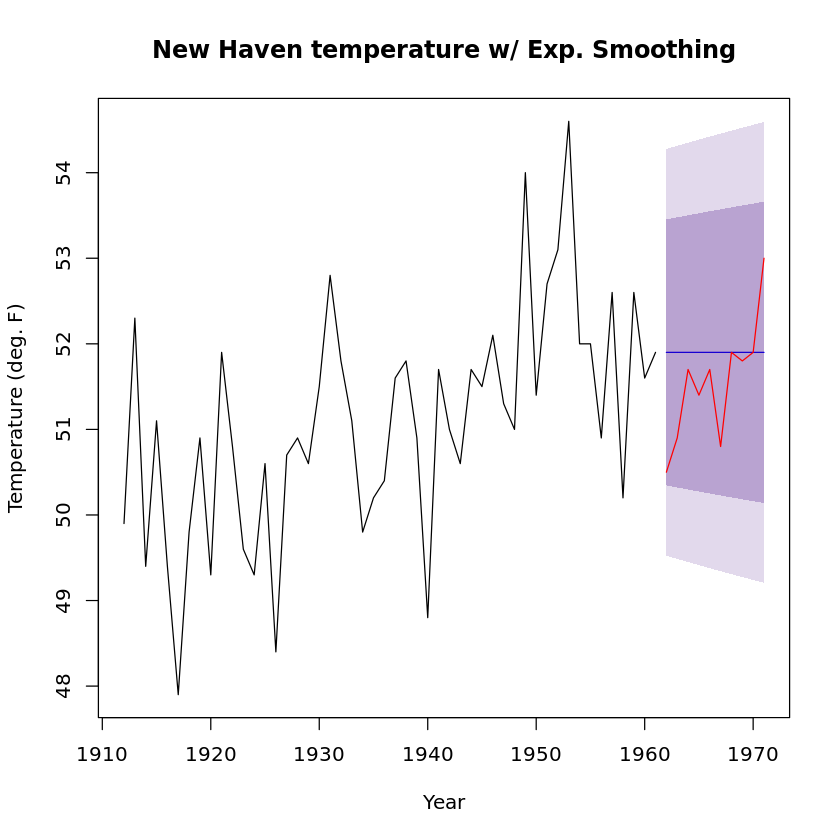

In [109]:
# https://r-charts.com/evolution/area-between-lines/
# https://druedin.com/2022/07/02/how-to-specify-rgb-colours-and-transparency-in-r-plots/

# Baseline
plot(index(ts_nhtemp), coredata(ts_nhtemp), type = "l", 
     col = rgb(1,1,1,0), main = "New Haven temperature w/ Exp. Smoothing",
     xlab = "Year",
     ylab = "Temperature (deg. F)")

par(new =TRUE)

# Forecast mean
lines(index(pred_nhtemp_mean), coredata(pred_nhtemp_mean), type = "l", col = "blue")

# 95% p-vals region
polygon(x = c(index(pred_nhtemp_mean), rev(index(pred_nhtemp_mean))), 
        y = c(coredata(pred_nhtemp_lower), rev(coredata(pred_nhtemp_upper))), 
        border = FALSE,
        col = rgb(0.25,0,0.5,0.15))

# 80% p-vals region
polygon(x = c(index(pred_nhtemp_mean), rev(index(pred_nhtemp_mean))), 
        y = c(coredata(pred_nhtemp[["lower"]][,"80%"]), 
              rev(coredata(pred_nhtemp[["upper"]][,"80%"]))), 
        border = FALSE,
        col = rgb(0.25,0,0.5,0.25))

# Training data
lines(index(ts_nhtemp_train), coredata(ts_nhtemp_train), type = "l")

# Test data (true values)
lines(index(ts_nhtemp_test), coredata(ts_nhtemp_test), col ="red")

#### Holt-Winters model forecast

We do the same as previous case:

In [111]:
# Make forecast with 10 predictions:
pred_logAirP <- forecast(logAirP_HW_model, h= N_pred)

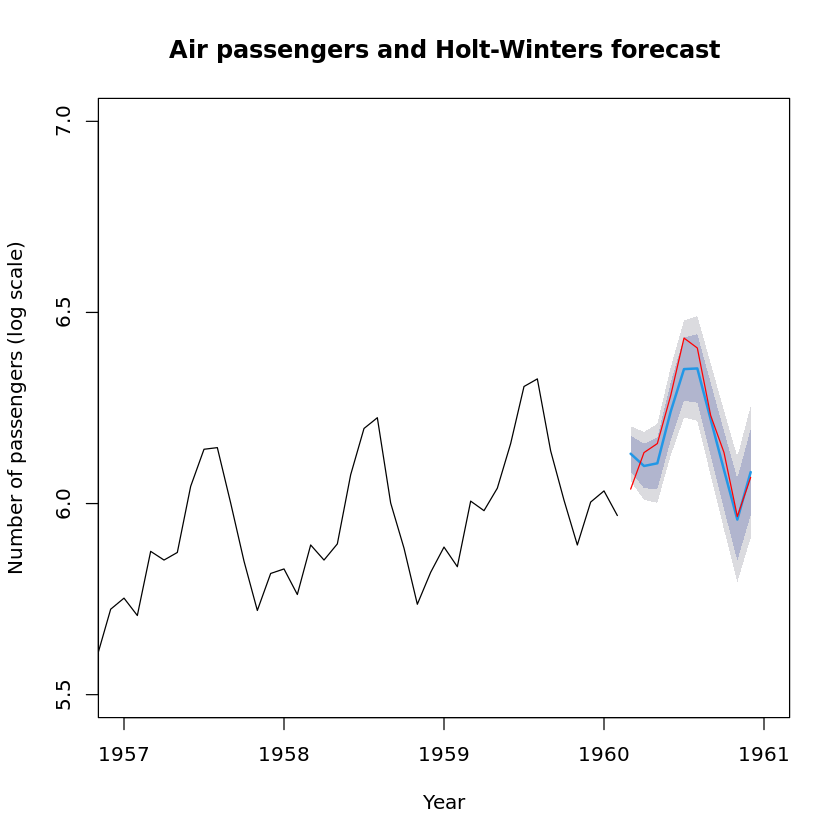

In [115]:
# Plot from forecast object
plot(pred_logAirP,
     main = "Air passengers and Holt-Winters forecast",
     xlab = "Year",
     ylab = "Number of passengers (log scale)",
     ylim = c(5.5,7),
     xlim = c(1957,1961)
    )
par(new =TRUE)
# Test data (true values)
lines(index(ts_log_AirP_test), coredata(ts_log_AirP_test), col ="red")